# Explorando Redes Neurais e Teoria dos Grafos nas Redes Sociais

## Link do Dataset (IMDB Dataset of 50K Movie Reviews)
---
**https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews/data**


## Sobre o Dataset



---

Conjunto de dados IMDB com 50 mil resenhas de filmes para processamento de linguagem natural ou análise de texto.
Este é um conjunto de dados para classificação de sentimento binário contendo substancialmente mais dados do que conjuntos de dados de referência anteriores. Fornecemos um conjunto de 25.000 resenhas de filmes altamente polares para treinamento e 25.000 para teste. Portanto, preveja o número de avaliações positivas e negativas usando algoritmos de classificação ou de aprendizado profundo.

---

Características:

    Recursos totais: 2
    Linha total: 50.000

---

    Recurso	   |    Descrição
    Revisão	   |    Comentário do usuário sobre o filme
    Sentimento	|   O sentimento do comentário feito sobre o filme

### Import Necessários

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import pandas as pd
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import learning_curve
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from bs4 import BeautifulSoup
import re
import nltk
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from nltk.corpus import stopwords
import gensim

import warnings
warnings.filterwarnings("ignore")

### Carregando a base

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/joaovpnt/imdb_model/main/dataset/IMDB%20Dataset.csv')
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


### Checando os dados

In [3]:
#Shape
data.shape

(50000, 2)

In [4]:
#Tipos de dados
data.dtypes

review       object
sentiment    object
dtype: object

In [5]:
#Valores NaN
print(data.isna().sum())

review       0
sentiment    0
dtype: int64


In [6]:
#Valores Nulos
print(data.isnull().sum())

review       0
sentiment    0
dtype: int64


### Analisando a distribuição dos dados

In [7]:
# Gráfico de pizza com cores personalizadas
fig = px.pie(data['sentiment'].value_counts(),
             values='sentiment',
             names=data['sentiment'].value_counts().index,
             color_discrete_sequence=["#ff0000", "#808080"],  # Vermelho e cinza
             title='Distribuição de Emoções Positivas / Negativas',
             hole=0.1)

fig.update_traces(textinfo='percent+label',
                  marker=dict(line=dict(color='#000000', width=2)))

fig.update_layout(template="plotly_dark")  # Mudança para o fundo preto

fig.show()

In [8]:
# Gráfico de contagem com cores personalizadas
fig2 = px.histogram(data, x='sentiment',
                    color='sentiment',
                    color_discrete_sequence=["#ff0000", "#808080"],  # Vermelho e cinza
                    title='Distribuição de Emoções Positivas / Negativas')

fig2.update_layout(barmode='group', template="plotly_dark")  # Fundo preto

fig2.show()

### Como está distribuído esses textos?

In [9]:
exemplo_avaliacao_positivo = data.review[2]
exemplo_avaliacao_positivo

'I thought this was a wonderful way to spend time on a too hot summer weekend, sitting in the air conditioned theater and watching a light-hearted comedy. The plot is simplistic, but the dialogue is witty and the characters are likable (even the well bread suspected serial killer). While some may be disappointed when they realize this is not Match Point 2: Risk Addiction, I thought it was proof that Woody Allen is still fully in control of the style many of us have grown to love.<br /><br />This was the most I\'d laughed at one of Woody\'s comedies in years (dare I say a decade?). While I\'ve never been impressed with Scarlet Johanson, in this she managed to tone down her "sexy" image and jumped right into a average, but spirited young woman.<br /><br />This may not be the crown jewel of his career, but it was wittier than "Devil Wears Prada" and more interesting than "Superman" a great comedy to go see with friends.'

In [10]:
exemplo_avaliacao_positivo = exemplo_avaliacao_positivo.lower()
exemplo_avaliacao_positivo

'i thought this was a wonderful way to spend time on a too hot summer weekend, sitting in the air conditioned theater and watching a light-hearted comedy. the plot is simplistic, but the dialogue is witty and the characters are likable (even the well bread suspected serial killer). while some may be disappointed when they realize this is not match point 2: risk addiction, i thought it was proof that woody allen is still fully in control of the style many of us have grown to love.<br /><br />this was the most i\'d laughed at one of woody\'s comedies in years (dare i say a decade?). while i\'ve never been impressed with scarlet johanson, in this she managed to tone down her "sexy" image and jumped right into a average, but spirited young woman.<br /><br />this may not be the crown jewel of his career, but it was wittier than "devil wears prada" and more interesting than "superman" a great comedy to go see with friends.'

In [11]:
exemplo_avaliacao_negativo = data.review[3]
exemplo_avaliacao_negativo

"Basically there's a family where a little boy (Jake) thinks there's a zombie in his closet & his parents are fighting all the time.<br /><br />This movie is slower than a soap opera... and suddenly, Jake decides to become Rambo and kill the zombie.<br /><br />OK, first of all when you're going to make a film you must Decide if its a thriller or a drama! As a drama the movie is watchable. Parents are divorcing & arguing like in real life. And then we have Jake with his closet which totally ruins all the film! I expected to see a BOOGEYMAN similar movie, and instead i watched a drama with some meaningless thriller spots.<br /><br />3 out of 10 just for the well playing parents & descent dialogs. As for the shots with Jake: just ignore them."

In [12]:
exemplo_avaliacao_negativo = exemplo_avaliacao_negativo.lower()
exemplo_avaliacao_negativo

"basically there's a family where a little boy (jake) thinks there's a zombie in his closet & his parents are fighting all the time.<br /><br />this movie is slower than a soap opera... and suddenly, jake decides to become rambo and kill the zombie.<br /><br />ok, first of all when you're going to make a film you must decide if its a thriller or a drama! as a drama the movie is watchable. parents are divorcing & arguing like in real life. and then we have jake with his closet which totally ruins all the film! i expected to see a boogeyman similar movie, and instead i watched a drama with some meaningless thriller spots.<br /><br />3 out of 10 just for the well playing parents & descent dialogs. as for the shots with jake: just ignore them."

### Opa, opa e opa! Percebemos que temos Tags HTML no meio das revisões!

Como podemos retirar esses caracteres?

Utilizando a biblioteca BeatifulSoup



In [13]:
exemplo_avaliacao_positivo = BeautifulSoup(exemplo_avaliacao_positivo).get_text()
exemplo_avaliacao_positivo

'i thought this was a wonderful way to spend time on a too hot summer weekend, sitting in the air conditioned theater and watching a light-hearted comedy. the plot is simplistic, but the dialogue is witty and the characters are likable (even the well bread suspected serial killer). while some may be disappointed when they realize this is not match point 2: risk addiction, i thought it was proof that woody allen is still fully in control of the style many of us have grown to love.this was the most i\'d laughed at one of woody\'s comedies in years (dare i say a decade?). while i\'ve never been impressed with scarlet johanson, in this she managed to tone down her "sexy" image and jumped right into a average, but spirited young woman.this may not be the crown jewel of his career, but it was wittier than "devil wears prada" and more interesting than "superman" a great comedy to go see with friends.'

### E para limpar Pontuações e Caracteres especiais? Podemos usar Regex!

In [14]:
exemplo_avaliacao_positivo = re.sub("[^a-zA-Z]",' ',exemplo_avaliacao_positivo)
exemplo_avaliacao_positivo

'i thought this was a wonderful way to spend time on a too hot summer weekend  sitting in the air conditioned theater and watching a light hearted comedy  the plot is simplistic  but the dialogue is witty and the characters are likable  even the well bread suspected serial killer   while some may be disappointed when they realize this is not match point    risk addiction  i thought it was proof that woody allen is still fully in control of the style many of us have grown to love this was the most i d laughed at one of woody s comedies in years  dare i say a decade    while i ve never been impressed with scarlet johanson  in this she managed to tone down her  sexy  image and jumped right into a average  but spirited young woman this may not be the crown jewel of his career  but it was wittier than  devil wears prada  and more interesting than  superman  a great comedy to go see with friends '

### Outro Exemplo de Teste

In [15]:
exemplo_avaliacao2 = data.review[50]
exemplo_avaliacao2

'Return to the 36th Chamber is one of those classic Kung-Fu movies which Shaw produces back in the 70s and 80s, whose genre is equivalent to the spaghetti westerns of Hollywood, and the protagonist Gordon Liu, the counterpart to the western\'s Clint Eastwood. Digitally remastered and a new print made for the Fantastic Film Fest, this is "Presented in Shaw Scope", just like the good old days.<br /><br />This film is a simple story of good versus evil, told in 3 acts, which more or less sums up the narrative of martial arts films in that era.<br /><br />Act One sets up the premise. Workers in a dye-mill of a small village are unhappy with their lot, having their wages cut by 20% by incoming manchu gangsters. They can\'t do much about their exploitation because none of them are martial arts skilled to take on the gangsters, and their boss. At first they had a minor success in getting Liu to impersonate a highly skilled Shaolin monk (one of the best comedy sequences), but their rouse got e

In [16]:
exemplo_avaliacao2 = BeautifulSoup(exemplo_avaliacao2).get_text()
exemplo_avaliacao2

'Return to the 36th Chamber is one of those classic Kung-Fu movies which Shaw produces back in the 70s and 80s, whose genre is equivalent to the spaghetti westerns of Hollywood, and the protagonist Gordon Liu, the counterpart to the western\'s Clint Eastwood. Digitally remastered and a new print made for the Fantastic Film Fest, this is "Presented in Shaw Scope", just like the good old days.This film is a simple story of good versus evil, told in 3 acts, which more or less sums up the narrative of martial arts films in that era.Act One sets up the premise. Workers in a dye-mill of a small village are unhappy with their lot, having their wages cut by 20% by incoming manchu gangsters. They can\'t do much about their exploitation because none of them are martial arts skilled to take on the gangsters, and their boss. At first they had a minor success in getting Liu to impersonate a highly skilled Shaolin monk (one of the best comedy sequences), but their rouse got exposed when they pushed 

In [17]:
exemplo_avaliacao2 = re.sub("[^a-zA-Z]",' ',exemplo_avaliacao2)
exemplo_avaliacao2

'Return to the   th Chamber is one of those classic Kung Fu movies which Shaw produces back in the   s and   s  whose genre is equivalent to the spaghetti westerns of Hollywood  and the protagonist Gordon Liu  the counterpart to the western s Clint Eastwood  Digitally remastered and a new print made for the Fantastic Film Fest  this is  Presented in Shaw Scope   just like the good old days This film is a simple story of good versus evil  told in   acts  which more or less sums up the narrative of martial arts films in that era Act One sets up the premise  Workers in a dye mill of a small village are unhappy with their lot  having their wages cut by     by incoming manchu gangsters  They can t do much about their exploitation because none of them are martial arts skilled to take on the gangsters  and their boss  At first they had a minor success in getting Liu to impersonate a highly skilled Shaolin monk  one of the best comedy sequences   but their rouse got exposed when they pushed th

### É importante no pré processamento que palavras de pouco impacto sejam retiradas, para que o modelo consiga processar as palavras de mais impacto como por exemplo: "Are, Is, They e etc"

####Para isso utilizamos a biblioteca NLTK:

    NLTK (Natural Language Toolkit) é uma plataforma líder para a construção de programas Python para trabalhar com dados de linguagem humana.
    Foi criada para suportar a pesquisa e a educação em processamento de linguagem natural (NLP).
    Que possui uma ampla gama de recursos e funcionalidades que ajudam os desenvolvedores a trabalhar com texto e linguagem humana de forma eficaz.

In [18]:
exemplo_avaliacao_positivo = exemplo_avaliacao_positivo.split()

In [19]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [20]:
palavras = set(stopwords.words("english"))
exemplo_avaliacao_positivo = [palavra for palavra in exemplo_avaliacao_positivo if palavra not in palavras]
exemplo_avaliacao_positivo

['thought',
 'wonderful',
 'way',
 'spend',
 'time',
 'hot',
 'summer',
 'weekend',
 'sitting',
 'air',
 'conditioned',
 'theater',
 'watching',
 'light',
 'hearted',
 'comedy',
 'plot',
 'simplistic',
 'dialogue',
 'witty',
 'characters',
 'likable',
 'even',
 'well',
 'bread',
 'suspected',
 'serial',
 'killer',
 'may',
 'disappointed',
 'realize',
 'match',
 'point',
 'risk',
 'addiction',
 'thought',
 'proof',
 'woody',
 'allen',
 'still',
 'fully',
 'control',
 'style',
 'many',
 'us',
 'grown',
 'love',
 'laughed',
 'one',
 'woody',
 'comedies',
 'years',
 'dare',
 'say',
 'decade',
 'never',
 'impressed',
 'scarlet',
 'johanson',
 'managed',
 'tone',
 'sexy',
 'image',
 'jumped',
 'right',
 'average',
 'spirited',
 'young',
 'woman',
 'may',
 'crown',
 'jewel',
 'career',
 'wittier',
 'devil',
 'wears',
 'prada',
 'interesting',
 'superman',
 'great',
 'comedy',
 'go',
 'see',
 'friends']

### Passando tudo para o Dataframe

In [21]:
def processo(revisao):
    # Remover tags HTML da revisão
    revisao = BeautifulSoup(revisao, features="html.parser").get_text()
    # Remover pontuações e números da revisão
    revisao = re.sub("[^a-zA-Z]", ' ', revisao)  # Adicionando caracteres acentuados
    # Converter para minúsculas e dividir para eliminar stopwords
    revisao = revisao.lower()
    revisao = revisao.split()
    # Remover stopwords da revisão
    stopwords_pt = set(stopwords.words("english"))  # Converter em conjunto para busca mais rápida
    revisao = [ccc for ccc in revisao if ccc not in stopwords_pt]
    # Juntar as palavras em um parágrafo e retornar
    return " ".join(revisao)

In [22]:
train_data = []
for i in range(len(data["review"])):
    if (i+1) % 10000 == 0:
        print("Valor =", i+1)
    train_data.append(processo(data["review"][i]))

Valor = 10000
Valor = 20000
Valor = 30000
Valor = 40000
Valor = 50000


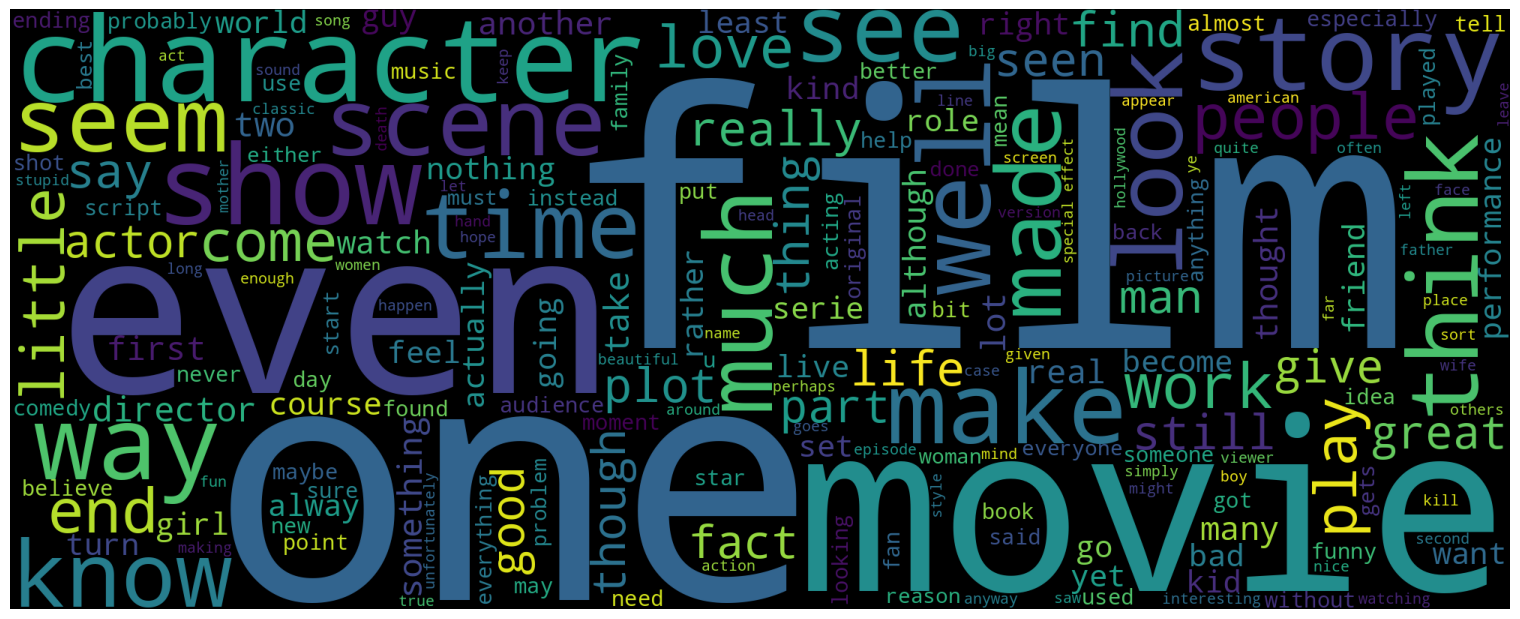

In [23]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = ' '.join(train_data)

# Cria uma instância WordCloud
wordcloud = WordCloud(width=2000, height=800,
                      background_color='black',
                      min_font_size=10).generate(text)

# Mostra a imagem da nuvem de palavras usando matplotlib
plt.figure(figsize=(18, 6), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [24]:
import plotly.express as px
from collections import Counter

text = ' '.join(train_data)

# Contar a frequência de cada palavra
word_freq = Counter(text.split())

# Ordenar as palavras pela contagem mais alta
sorted_word_freq = sorted(word_freq.items(), key=lambda x: x[1], reverse=True)

# Extrair as palavras mais comuns e suas contagens
top_words = [pair[0] for pair in sorted_word_freq[:20]]
top_word_counts = [pair[1] for pair in sorted_word_freq[:20]]

# Criar o gráfico de barras usando o Plotly com fundo preto, texto em branco e barras mostrando a quantidade
fig = px.bar(x=top_words, y=top_word_counts, text=top_word_counts, title='Palavras Mais Repetidas', labels={'x': 'Palavras', 'y': 'Contagem'})
fig.update_layout(plot_bgcolor='black', paper_bgcolor='black', font_color='white')
fig.update_traces(marker_color='red')
fig.show()


### Fazendo o Split dos Dados

In [25]:
y = train_data
x = np.array(data["sentiment"])

train_x, test_x, y_train, y_test = train_test_split(y,x, stratify = x ,test_size = 0.3, shuffle = True , random_state = 1)

In [26]:
vectorizer = CountVectorizer( max_features = 1000)

train_x = vectorizer.fit_transform(train_x)

In [27]:
train_x = train_x.toarray()
train_y = y_train

In [28]:
print("Dados treinados totais: ", train_x.shape[0])
print("Dados treinados totais: ", train_y.shape[0])

Dados treinados totais:  35000
Dados treinados totais:  35000


### Validando Modelos

In [29]:
models = []

models.append(('Logistic Regression',LogisticRegression()))
models.append(('Ridge Classifier', RidgeClassifier()))
models.append(('Random Forest Classifier',RandomForestClassifier()))
models.append(('Decision Tree Classifier',DecisionTreeClassifier()))
models.append(('Ada Boost Classifier',AdaBoostClassifier()))

In [30]:
resultado_teste = vectorizer.transform(test_x)

In [31]:
resultado_teste = resultado_teste.toarray()

In [32]:
resultado_teste.shape

(15000, 1000)

In [33]:
for name, model in models:
    print('----------------------------------------------------------------')
    model.fit(train_x, train_y)
    test_pred = model.predict(resultado_teste)
    print(name, 'Acurácia: ', accuracy_score(y_test, test_pred))
    print(name, 'Precisão: ', precision_score(y_test, test_pred, average='weighted'))
    print(name, 'Recall: ', recall_score(y_test, test_pred, average='weighted'))
    print(name, 'F1 Score: ', f1_score(y_test, test_pred, average='weighted'))

----------------------------------------------------------------
Logistic Regression Acurácia:  0.8622666666666666
Logistic Regression Precisão:  0.8624662712038543
Logistic Regression Recall:  0.8622666666666666
Logistic Regression F1 Score:  0.8622477021547641
----------------------------------------------------------------
Ridge Classifier Acurácia:  0.8578
Ridge Classifier Precisão:  0.8583619689051584
Ridge Classifier Recall:  0.8578
Ridge Classifier F1 Score:  0.857744230047948
----------------------------------------------------------------
Random Forest Classifier Acurácia:  0.8286666666666667
Random Forest Classifier Precisão:  0.8286760156733348
Random Forest Classifier Recall:  0.8286666666666667
Random Forest Classifier F1 Score:  0.8286654482876322
----------------------------------------------------------------
Decision Tree Classifier Acurácia:  0.7132
Decision Tree Classifier Precisão:  0.7132410029277807
Decision Tree Classifier Recall:  0.7132
Decision Tree Classifier

# Obrigado